## Preliminaries

### Paths

In [1]:
import os
import pathlib
import sys

In [2]:
if not 'google.colab' in str(get_ipython()):
    
    notebooks = os.path.split(os.getcwd())[0]
    parent = str(pathlib.Path(notebooks).parent)
    sys.path.append(parent)

<br>
<br>

### Libraries

In [3]:
%matplotlib inline

import datetime

import logging
import collections

import numpy as np
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]="-1"  
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import IPython
import IPython.display


<br>
<br>

### Custom

In [4]:
import src.prototyping.Settings

import src.prototyping.DataSample
import src.prototyping.DataSplitting
import src.prototyping.DataNormalisation

import src.prototyping.WindowGenerator
import src.prototyping.WindowGraphs

import src.prototyping.ModellingSteps

<br>

Settings:

> matplotlib.rcParams.update({'font.size': 13})<br>
> matplotlib.rcParams['text.usetex'] = False

> plt.rcParams['figure.constrained_layout.use'] = False        

> sns.set(font_scale=1)<br>
> sns.axes_style('whitegrid', {"axes.facecolor": ".9"})


In [5]:
src.prototyping.Settings.Settings().aesthetics()

<br>

### Logging

In [6]:
logging.basicConfig(level=logging.INFO,
                    format='\n%(message)s\n%(asctime)s.%(msecs)03d\n',
                    datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

<br>
<br>

## A Trust Data Set

In [7]:
reduced = src.prototyping.DataSample.DataSample(parent=parent).exc()

In [8]:
logger.info(reduced.columns)


Index(['covidOccupiedBeds', 'covidOccupiedMVBeds', 'estimatedNewAdmissions',
       'EDC0-4', 'EDC5-9', 'EDC10-14', 'EDC15-19', 'EDC20-24', 'EDC25-29',
       'EDC30-34', 'EDC35-39', 'EDC40-44', 'EDC45-49', 'EDC50-54', 'EDC55-59',
       'EDC60-64', 'EDC65-69', 'EDC70-74', 'EDC75-79', 'EDC80-84', 'EDC85-89',
       'EDC90+', 'newDeaths28DaysByDeathDate', 'EDV12-15', 'EDV16-17',
       'EDV18-24', 'EDV25-29', 'EDV30-34', 'EDV35-39', 'EDV40-44', 'EDV45-49',
       'EDV50-54', 'EDV55-59', 'EDV60-64', 'EDV65-69', 'EDV70-74', 'EDV75-79',
       'EDV80-84', 'EDV85-89', 'EDV90+'],
      dtype='object')
2022-01-21 18:55:58.370



<br>

### Sample Graphs

In [9]:
excerpt = reduced.copy()[['estimatedNewAdmissions', 'newDeaths28DaysByDeathDate']]

for field in excerpt.columns:
    excerpt.loc[:, field + 'C'] = excerpt[field].cumsum(axis=0)

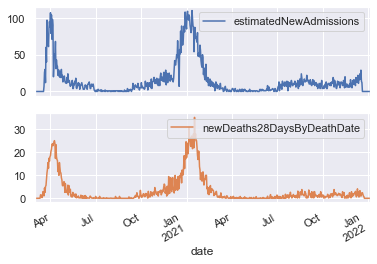

In [10]:
excerpt.iloc[:, :2].plot(subplots = True);

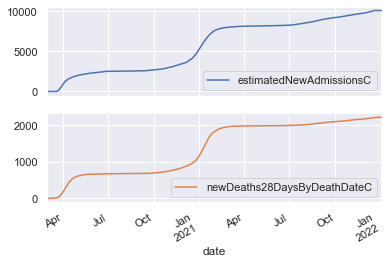

In [11]:
excerpt.iloc[:, 2:].plot(subplots = True);

<br>

Description

In [12]:
reduced.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
covidOccupiedBeds,675.0,154.087407,187.783897,0.0,31.500000,101.000000,160.000000,835.000000
covidOccupiedMVBeds,675.0,31.888889,41.556237,0.0,4.000000,19.000000,36.000000,182.000000
estimatedNewAdmissions,675.0,14.952593,22.559269,0.0,2.000000,8.000000,14.000000,110.000000
EDC0-4,675.0,20.257735,35.949688,0.0,0.377663,4.433935,25.932883,239.482931
EDC5-9,675.0,18.645138,30.082972,0.0,0.460874,5.391955,25.339046,199.794583
EDC10-14,675.0,17.069579,27.002719,0.0,0.696951,6.217174,22.802005,180.534884
EDC15-19,675.0,22.065063,34.078740,0.0,2.156989,10.012356,28.711561,236.253680
EDC20-24,675.0,30.853663,46.865634,0.0,4.130662,14.465133,39.587521,330.166955
EDC25-29,675.0,34.368527,52.274340,0.0,4.167598,16.547830,43.877014,368.151663
EDC30-34,675.0,29.863075,45.515088,0.0,2.922445,13.342141,38.388576,315.711348


<br>
<br>

### Structuring

In [13]:
Fraction = collections.namedtuple(typename='Fraction', field_names=['training', 'validating', 'testing'])

<br>

Split

In [14]:
splits = src.prototyping.DataSplitting.DataSplitting(fraction=Fraction._make((0.75, 0.15, 0.10)))
training, validating, testing = splits.exc(data=reduced)

<br>

Preview

In [15]:
logger.info('Data: %s', reduced.shape)

logger.info('Training: %s', training.shape)
logger.info('Validating: %s', validating.shape)
logger.info('Testing: %s', testing.shape)


Data: (675, 40)
2022-01-21 18:55:59.951


Training: (506, 40)
2022-01-21 18:55:59.952


Validating: (101, 40)
2022-01-21 18:55:59.953


Testing: (68, 40)
2022-01-21 18:55:59.954



<br>
<br>

### Normalisation

* Via training data means & deviations only
* Moving average normalisation

In [16]:
normalisation = src.prototyping.DataNormalisation.DataNormalisation(training=training, validating=validating, testing=testing)

<br>

The normalised values

In [17]:
training_, validating_, testing_ = normalisation.exc()

logger.info('Training: %s', training_.shape)
logger.info('Validating: %s', validating_.shape)
logger.info('Testing: %s', testing_.shape)


Training: (506, 40)
2022-01-21 18:55:59.972


Validating: (101, 40)
2022-01-21 18:55:59.973


Testing: (68, 40)
2022-01-21 18:55:59.974



<br>

A preview of the after-normalisation values of each variable

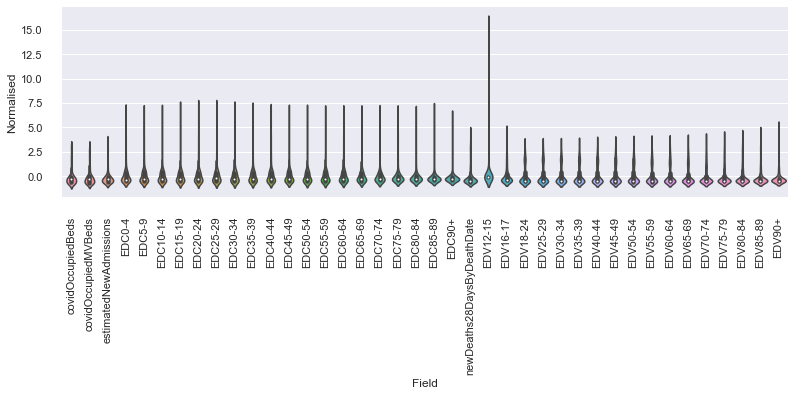

In [18]:
normalisation.graph(data=reduced)

<br>
<br>

## Windows

In [19]:
Arguments = collections.namedtuple(typename='Arguments', 
                                   field_names=['input_width', 'label_width','shift', 'training_', 'validating_', 'testing_', 'label_columns'])

<br>
<br>

### Window


<br>

**Case**

> * Predict `output_steps` days into the future, based on `input_width` days of history

<br>

Hence, the window arguments

In [20]:
output_steps = 9
input_width = 23

In [21]:
arguments = Arguments(input_width=input_width, label_width=output_steps, shift=output_steps, 
                      training_=training_, validating_=validating_, testing_=testing_, 
                      label_columns=['estimatedNewAdmissions'])

<br>

Initiate

In [22]:
window = src.prototyping.WindowGenerator.WindowGenerator(
    input_width=arguments.input_width, label_width=arguments.label_width, shift=arguments.shift,
    training=arguments.training_, validating=arguments.validating_, testing=arguments.testing_, 
    label_columns=arguments.label_columns)

In [23]:
logger.info(window)


Total window size: 32
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [23 24 25 26 27 28 29 30 31]
Label column name(s): ['estimatedNewAdmissions']
2022-01-21 18:56:01.157



<br>

**Specifications**

In [24]:
logger.info(window.train.element_spec)
logger.info('Input: %s', window.example[0].shape)
logger.info('Output: %s', window.example[1].shape)


(TensorSpec(shape=(None, 23, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name=None))
2022-01-21 18:56:01.643


Input: (32, 23, 40)
2022-01-21 18:56:01.733


Output: (32, 9, 1)
2022-01-21 18:56:01.817



<br>

**Graph**

In [25]:
graph = src.prototyping.WindowGraphs.WindowGraphs(
    input_width=arguments.input_width, label_width=arguments.label_width, shift=arguments.shift,
    training=arguments.training_, validating=arguments.validating_, testing=arguments.testing_, 
    label_columns=arguments.label_columns)

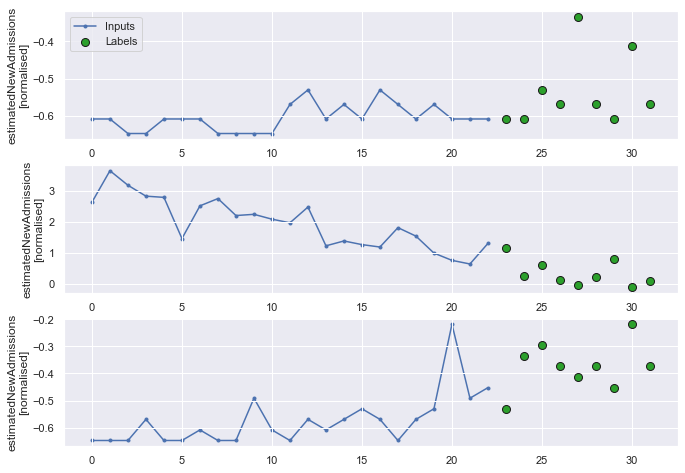

In [26]:
graph.plot()

<br>
<br>

## Modelling

In [27]:
column_indices = {name: i for i, name in enumerate(reduced.columns)}
logger.info(column_indices)


{'covidOccupiedBeds': 0, 'covidOccupiedMVBeds': 1, 'estimatedNewAdmissions': 2, 'EDC0-4': 3, 'EDC5-9': 4, 'EDC10-14': 5, 'EDC15-19': 6, 'EDC20-24': 7, 'EDC25-29': 8, 'EDC30-34': 9, 'EDC35-39': 10, 'EDC40-44': 11, 'EDC45-49': 12, 'EDC50-54': 13, 'EDC55-59': 14, 'EDC60-64': 15, 'EDC65-69': 16, 'EDC70-74': 17, 'EDC75-79': 18, 'EDC80-84': 19, 'EDC85-89': 20, 'EDC90+': 21, 'newDeaths28DaysByDeathDate': 22, 'EDV12-15': 23, 'EDV16-17': 24, 'EDV18-24': 25, 'EDV25-29': 26, 'EDV30-34': 27, 'EDV35-39': 28, 'EDV40-44': 29, 'EDV45-49': 30, 'EDV50-54': 31, 'EDV55-59': 32, 'EDV60-64': 33, 'EDV65-69': 34, 'EDV70-74': 35, 'EDV75-79': 36, 'EDV80-84': 37, 'EDV85-89': 38, 'EDV90+': 39}
2022-01-21 18:56:02.865



In [28]:
n_features = reduced.shape[1]

<br>

Initiate a generic modelling steps instance

In [29]:
steps = src.prototyping.ModellingSteps.ModellingSteps()

<br>
<br>

### Convolution

In [30]:
convolution_width = 18

In [31]:
convolution = tf.keras.Sequential([    
    tf.keras.layers.Lambda(lambda x: x[:, -convolution_width:, :]),    
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(convolution_width)),
    tf.keras.layers.Dense(output_steps * n_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([output_steps, n_features])
])

history = steps.modelling(model=convolution, window=window)

validation_performance = {}
performance = {}

validation_performance['Convolution'] = convolution.evaluate(window.validate)
performance['Convolution'] = convolution.evaluate(window.test, verbose=0)

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.6321 - mean_absolute_error: 0.4640 - val_loss: 0.0699 - val_mean_absolute_error: 0.2207
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3449 - mean_absolute_error: 0.3297 - val_loss: 0.0638 - val_mean_absolute_error: 0.2107
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2339 - mean_absolute_error: 0.2818 - val_loss: 0.0416 - val_mean_absolute_error: 0.1680
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1784 - mean_absolute_error: 0.2418 - val_loss: 0.0330 - val_mean_absolute_error: 0.1478
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1530 - mean_absolute_error: 0.2241 - val_loss: 0.0474 - val_mean_absolute_error: 0.1839
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.1647


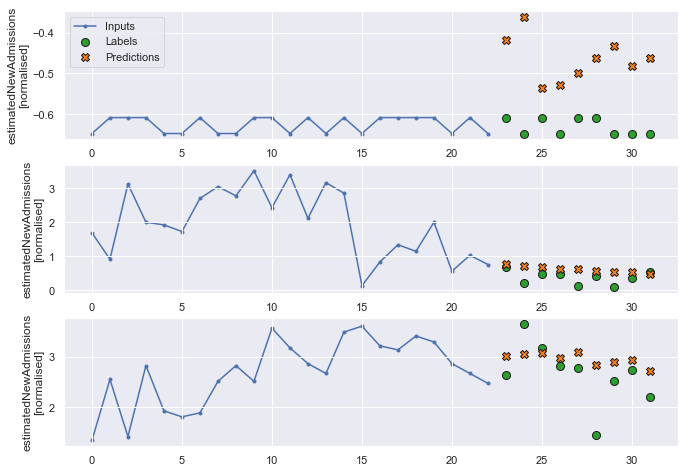

In [32]:
graph.plot(convolution)

<br>
<br>

### RNN

In [33]:
lstm = tf.keras.Sequential([    
    tf.keras.layers.LSTM(32, return_sequences=False),    
    tf.keras.layers.Dense(output_steps * n_features, kernel_initializer=tf.initializers.zeros()),    
    tf.keras.layers.Reshape([output_steps, n_features])
])

history = steps.modelling(model=lstm, window=window)

validation_performance['LSTM'] = lstm.evaluate(window.validate)
performance['LSTM'] = lstm.evaluate(window.test, verbose=0)

Epoch 1/100
15/15 [==============================] - 3s 50ms/step - loss: 0.9324 - mean_absolute_error: 0.6606 - val_loss: 0.0726 - val_mean_absolute_error: 0.2298
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 0.7186 - mean_absolute_error: 0.5390 - val_loss: 0.0725 - val_mean_absolute_error: 0.2290
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 0.5175 - mean_absolute_error: 0.4006 - val_loss: 0.0775 - val_mean_absolute_error: 0.2360
Epoch 4/100
15/15 [==============================] - 0s 15ms/step - loss: 0.3618 - mean_absolute_error: 0.3213 - val_loss: 0.0720 - val_mean_absolute_error: 0.2246
Epoch 5/100
15/15 [==============================] - 0s 14ms/step - loss: 0.2635 - mean_absolute_error: 0.2757 - val_loss: 0.0598 - val_mean_absolute_error: 0.2021
Epoch 6/100
15/15 [==============================] - 0s 13ms/step - loss: 0.2089 - mean_absolute_error: 0.2526 - val_loss: 0.0506 - val_mean_absolute_error: 0.1823
Epoch 7/100
15/1

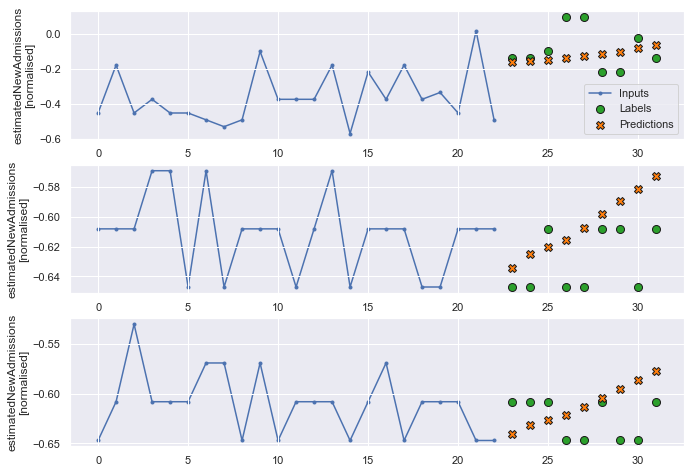

In [34]:
graph.plot(lstm)

<br>
<br>

### Autoregressive RNN

* `Feedback` class in progress

<br>
<br>

## Performance

* 0: loss
* 1: mean absolute error

In [35]:
performance

{'Convolution': [1.8057440519332886, 0.8472055196762085],
 'LSTM': [0.9678796529769897, 0.6459684371948242]}